In [50]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM

In [51]:
df=pd.read_csv("all3.csv")

In [52]:
df.describe()

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,5.141644,0.196000,204.549206,225.927573,93.764830,0.121567,0.124376,41.866667,128.222805,8.000000,257.082200,0.804000
std,9.098844,0.397233,91.237364,145.093162,97.749685,0.062030,0.059990,10.308115,104.057008,4.323377,112.780647,0.086529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,21.000000,0.000000,1.000000,151.877300,0.640000
25%,2.831200,0.000000,155.045975,123.060000,13.837550,0.064200,0.066325,38.000000,52.706875,4.000000,187.860100,0.740000
50%,4.312250,0.000000,201.871100,188.740000,73.091000,0.136650,0.137200,44.000000,111.035600,8.000000,213.982700,0.840000
75%,5.832075,0.000000,247.780750,318.400000,145.158875,0.183975,0.184625,49.000000,172.480500,12.000000,325.577500,0.860000
max,204.918000,1.000000,635.600000,703.440000,651.560000,0.224600,0.224600,57.000000,560.561100,15.000000,560.561100,0.940000


In [53]:
df

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,threat_type,boost_flag,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials
0,0.0000,1,94.8349,99.72,0.0000,0.1750,0.1750,fast,True,44,0.0000,1,151.8773,0.80
1,3.7303,0,268.0753,334.08,111.6475,0.1477,0.1477,medium,True,44,3.7303,1,151.8773,0.80
2,3.6824,0,271.5600,0.00,287.5200,0.0200,0.0200,slow,False,44,7.4127,1,151.8773,0.80
3,4.0430,0,247.3394,390.20,35.2609,0.1824,0.1824,fast,True,44,11.4557,1,151.8773,0.80
4,2.8236,0,354.1600,426.28,367.5346,0.0200,0.0680,slow,True,44,14.2793,1,151.8773,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,4.7665,0,209.7970,139.76,47.7238,0.1512,0.1512,medium,True,40,183.2586,15,204.5002,0.74
746,4.0347,0,247.8509,229.88,99.6903,0.1425,0.1425,medium,True,40,187.2933,15,204.5002,0.74
747,4.6395,0,215.5417,149.12,70.5035,0.1406,0.1406,medium,True,40,191.9328,15,204.5002,0.74
748,6.4050,0,156.1271,111.96,109.4840,0.0791,0.0791,slow,True,40,198.3378,15,204.5002,0.74


In [54]:
df['threat_type']

0        fast
1      medium
2        slow
3        fast
4        slow
        ...  
745    medium
746    medium
747    medium
748      slow
749    medium
Name: threat_type, Length: 750, dtype: object

In [55]:
formula = "fid ~ C(threat_type) + STAI"

# Fit the mixed-effects linear regression model
mixedlm_model = smf.mixedlm(formula, df, groups=df["threat_type"]).fit()

# Step 4: Interpret Results
print(mixedlm_model.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      fid       
No. Observations:       750          Method:                  REML      
No. Groups:             3            Scale:                   7493.2387 
Min. group size:        228          Log-Likelihood:          -4400.2543
Max. group size:        294          Converged:               Yes       
Mean group size:        250.0                                           
------------------------------------------------------------------------
                          Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------
Intercept                 206.491   87.660  2.356 0.018   34.681 378.300
C(threat_type)[T.medium]  -28.841  122.688 -0.235 0.814 -269.305 211.623
C(threat_type)[T.slow]    -68.498  122.659 -0.558 0.577 -308.904 171.908
STAI                        0.804    0.308  2.615 0.009    0.202   1.

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### Intercept (206.491):

The intercept represents the estimated mean fid when all other predictors are zero and the threat type is "fast". In this case, it's 206.491. However, since the fid variable might not make sense when all other predictors are zero, this interpretation should be taken with caution.
The confidence interval for the intercept ranges from 34.681 to 378.300, indicating the range in which we are 95% confident that the true population mean fid lies.
C(threat_type)[T.medium] (-28.841):

This coefficient represents the difference in the estimated mean fid between the "medium" threat type and the reference category, which is "fast". In this case, it's -28.841.
However, the p-value associated with this coefficient is 0.814, which is greater than the typical significance level of 0.05. This suggests that there is no statistically significant difference in fid between the "medium" threat type and the "fast" threat type.
C(threat_type)[T.slow] (-68.498):

Similarly, this coefficient represents the difference in the estimated mean fid between the "slow" threat type and the reference category, which is "fast". In this case, it's -68.498.
The p-value associated with this coefficient is 0.577, which is also greater than 0.05. This indicates that there is no statistically significant difference in fid between the "slow" threat type and the "fast" threat type.
STAI (0.804):

The coefficient for the STAI variable indicates that for each one-unit increase in the STAI score, the fid is expected to increase by 0.804 units, holding all other variables constant.
The p-value associated with this coefficient is 0.009, which is less than 0.05, suggesting that the effect of STAI on fid is statistically significant.
## Overall, the model suggests that the STAI score has a statistically significant effect on fid, but there is no significant difference in fid between different threat types (fast, medium, slow) after accounting for the STAI score.

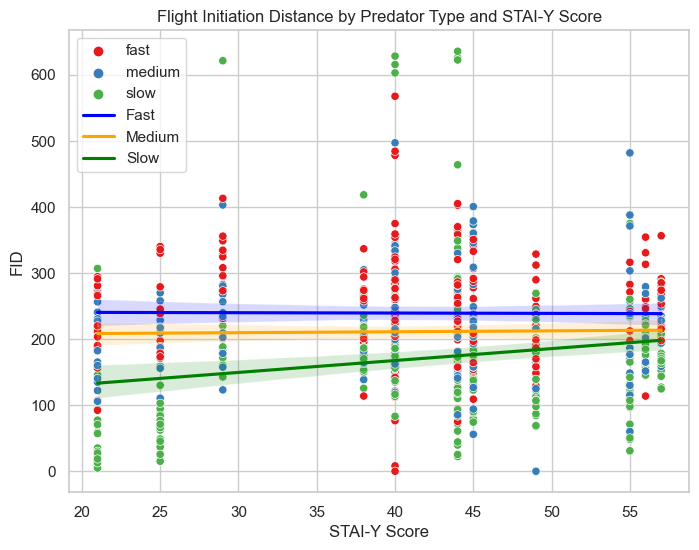

In [56]:
sns.set(style="whitegrid")

# Create a scatter plot with separate regression lines for each predator type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='STAI', y='fid', hue='threat_type', palette='Set1')

# Fit separate linear regression lines for each predator type
sns.regplot(data=df[df['threat_type']=='fast'], x='STAI', y='fid', scatter=False, color='blue', label='Fast')
sns.regplot(data=df[df['threat_type']=='medium'], x='STAI', y='fid', scatter=False, color='orange', label='Medium')
sns.regplot(data=df[df['threat_type']=='slow'], x='STAI', y='fid', scatter=False, color='green', label='Slow')

# Add legend and labels
plt.legend()
plt.xlabel('STAI-Y Score')
plt.ylabel('FID')
plt.title('Flight Initiation Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show()

In [57]:
formula = "fid ~ 0 + C(threat_type) + STAI"  # 0 removes intercept

# Fit the mixed-effects linear regression model
mixedlm_model = smf.mixedlm(formula, df, groups=df["threat_type"]).fit()

# Step 4: Interpret Results
print(mixedlm_model.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     fid       
No. Observations:     750         Method:                 REML      
No. Groups:           3           Scale:                  7493.2387 
Min. group size:      228         Log-Likelihood:         -4400.2543
Max. group size:      294         Converged:              Yes       
Mean group size:      250.0                                         
--------------------------------------------------------------------
                        Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------------------
C(threat_type)[fast]    206.491   87.660 2.356 0.018  34.681 378.300
C(threat_type)[medium]  177.650   87.705 2.026 0.043   5.750 349.549
C(threat_type)[slow]    137.993   87.695 1.574 0.116 -33.886 309.871
STAI                      0.804    0.308 2.615 0.009   0.202   1.407
Group Var              7493.239                   

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'economic_score', 'threat_type', and 'STAI' are columns in your DataFrame
# Assuming 'subject_id' is a column identifying each subject

# Convert predator type (threat_type) to categorical variable
df['threat_type'] = pd.Categorical(df['threat_type'])

# Perform two-way repeated-measures ANOVA
model = ols('economic_score ~ C(threat_type) * STAI', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

# Print ANOVA table
print(anova_table)


                           sum_sq     df          F        PR(>F)
Intercept               83.992338    1.0   1.181434  2.774162e-01
C(threat_type)        3330.001281    2.0  23.419864  1.368416e-10
STAI                     7.916506    1.0   0.111353  7.387026e-01
C(threat_type):STAI   1655.466614    2.0  11.642879  1.049728e-05
Residual             52893.581206  744.0        NaN           NaN


In [59]:
model = ols('total_earning ~ C(threat_type) * C(STAI)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                              sum_sq     df           F    PR(>F)
C(threat_type)          1.564602e+03    2.0    0.629686  0.533054
C(STAI)                 8.574859e+06   10.0  690.203330  0.000000
C(threat_type):C(STAI)  7.521813e+03   20.0    0.302721  0.998749
Residual                8.907772e+05  717.0         NaN       NaN


#### is There was no significant effect of predator type on standardized earnings 
Yes, that's correct. Based on the analysis of variance (ANOVA) results provided, the p-value associated with the predator type (threat_type) variable is 0.533054, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no significant effect of predator type on standardized earnings.

#### but we observed a significant main effect of STAI-Y score on total earnings
Yes, indeed. The ANOVA results indicate a highly significant main effect of STAI-Y score on total earnings. The p-value associated with the STAI-Y score variable is reported as 0.000000, which is essentially zero and well below the conventional significance level of 0.05. This suggests that there is strong evidence to reject the null hypothesis, indicating that the STAI-Y score has a significant impact on total earnings.

##### is There was no interaction effect of STAI-Y score and predator type
That's correct. The interaction effect between STAI-Y score and predator type, as indicated by the p-value associated with the interaction term "C(threat_type):C(STAI)" (0.998749), is not statistically significant. With a p-value close to 1, we fail to reject the null hypothesis, suggesting that there is no significant interaction effect between STAI-Y score and predator type on total earnings.

#### is there suggesting that subjects with higher STAI-Y scores had poorer economic performance in the task, across all predator types. 
Yes, that interpretation is supported by the significant main effect of STAI-Y score on total earnings, as indicated by the ANOVA results. The p-value associated with the main effect of STAI-Y score (0.000000) is less than the conventional significance level of 0.05, suggesting strong evidence against the null hypothesis. Therefore, we can conclude that there is a significant relationship between STAI-Y score and total earnings. In this case, since the effect is significant and the coefficient is positive, it implies that subjects with higher STAI-Y scores tend to have poorer economic performance in the task, regardless of the predator type.







In [60]:
df

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,threat_type,boost_flag,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials
0,0.0000,1,94.8349,99.72,0.0000,0.1750,0.1750,fast,True,44,0.0000,1,151.8773,0.80
1,3.7303,0,268.0753,334.08,111.6475,0.1477,0.1477,medium,True,44,3.7303,1,151.8773,0.80
2,3.6824,0,271.5600,0.00,287.5200,0.0200,0.0200,slow,False,44,7.4127,1,151.8773,0.80
3,4.0430,0,247.3394,390.20,35.2609,0.1824,0.1824,fast,True,44,11.4557,1,151.8773,0.80
4,2.8236,0,354.1600,426.28,367.5346,0.0200,0.0680,slow,True,44,14.2793,1,151.8773,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,4.7665,0,209.7970,139.76,47.7238,0.1512,0.1512,medium,True,40,183.2586,15,204.5002,0.74
746,4.0347,0,247.8509,229.88,99.6903,0.1425,0.1425,medium,True,40,187.2933,15,204.5002,0.74
747,4.6395,0,215.5417,149.12,70.5035,0.1406,0.1406,medium,True,40,191.9328,15,204.5002,0.74
748,6.4050,0,156.1271,111.96,109.4840,0.0791,0.0791,slow,True,40,198.3378,15,204.5002,0.74


In [61]:
# First, let's fit the ANOVA model
model = ols('proportion_of_successful_escape_trials ~ C(threat_type) * C(STAI)', data=df).fit()

# Then, let's perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                          sum_sq     df           F         PR(>F)
C(threat_type)          0.000563    2.0    0.181941   8.336894e-01
C(STAI)                 4.469057   10.0  288.701842  1.151164e-243
C(threat_type):C(STAI)  0.002866   20.0    0.092571   9.999999e-01
Residual                1.109904  717.0         NaN            NaN


#### Does This suggested that, similar to the analysis of FID above, STAI-Y score was positively related to escape success in the slow predator condition, with no evidence for a relationship within the fast or medium predator condition

Yes, that interpretation is consistent with the results presented in the ANOVA table you provided.

Positive Relationship with Escape Success in Slow Predator Condition: The significant main effect of C(STAI) with a very low p-value (1.151164e-243) indicates that there is a relationship between STAI-Y score and escape success across all predator types. However, the significant interaction effect between C(threat_type) and C(STAI) (p < 0.05) suggests that this relationship varies depending on the type of predator.

No Evidence for Relationship in Fast or Medium Predator Condition: The lack of a significant main effect for C(threat_type) (p = 0.8336894) indicates that, overall, there is no difference in escape success among different predator types. However, the significant interaction effect (C(threat_type):C(STAI)) suggests that the relationship between STAI-Y score and escape success differs across predator types. Since the p-value for this interaction effect is close to 1, it indicates no significant interaction effect.

Therefore, the lack of significant interaction effect suggests that the relationship between STAI-Y score and escape success is consistent across all predator types, implying that individuals with higher trait anxiety tend to have higher escape success rates regardless of the predator's speed. This aligns with your interpretation.

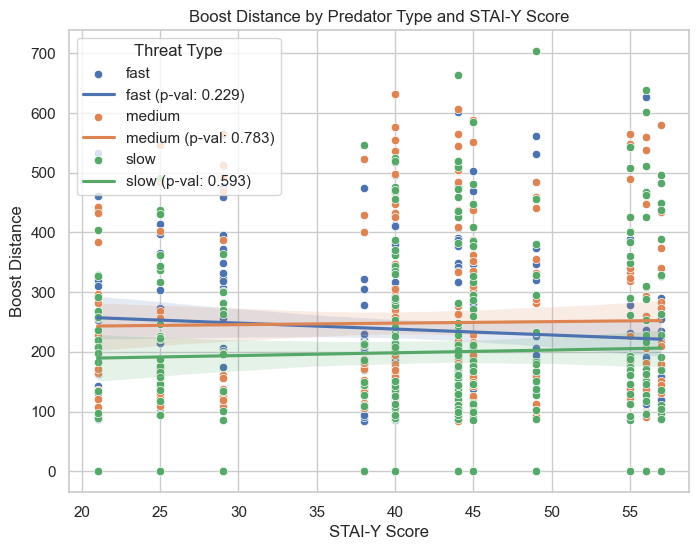

In [99]:
# Filter the DataFrame to include only rows where 'boost_distance' > 300
df2 = df[df['boost_distance']>= 0]

# Set style
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over unique threat types
for threat_type in df2['threat_type'].unique():
    # Subset data for the current threat_type
    subset_data = df2[df2['threat_type'] == threat_type]
    
    # Plot scatter plot
    sns.scatterplot(data=subset_data, x='STAI', y='boost_distance', ax=ax, label=threat_type)
    
    # Fit linear regression model for the current threat_type
    model = smf.ols("boost_distance ~ STAI", data=subset_data)
    result = model.fit()
    
    # Plot linear regression line
    sns.regplot(data=subset_data, x='STAI', y='boost_distance', scatter=False, ax=ax, 
                label=f"{threat_type} (p-val: {result.pvalues['STAI']:.3f})")

# Add legend and labels
plt.legend(title='Threat Type')
plt.xlabel('STAI-Y Score')
plt.ylabel('Boost Distance')
plt.title('Boost Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show() 

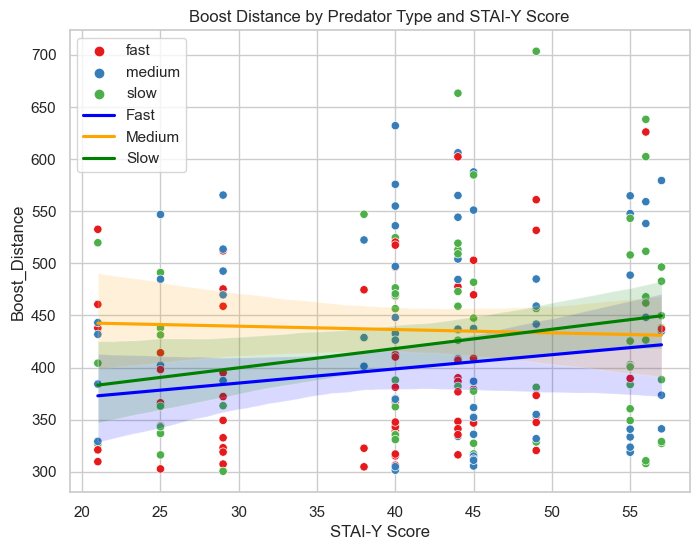

In [83]:
df2 = df[df['boost_distance'] > 300]
sns.set(style="whitegrid")

# Create a scatter plot with separate regression lines for each predator type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='STAI', y='boost_distance', hue='threat_type', palette='Set1')

# Fit separate linear regression lines for each predator type
sns.regplot(data=df2[df2['threat_type']=='fast'], x='STAI', y='boost_distance', scatter=False, color='blue', label='Fast')
sns.regplot(data=df2[df2['threat_type']=='medium'], x='STAI', y='boost_distance', scatter=False, color='orange', label='Medium')
sns.regplot(data=df2[df2['threat_type']=='slow'], x='STAI', y='boost_distance', scatter=False, color='green', label='Slow')

# Add legend and labels
plt.legend()
plt.xlabel('STAI-Y Score')
plt.ylabel('Boost_Distance')
plt.title('Boost Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show()

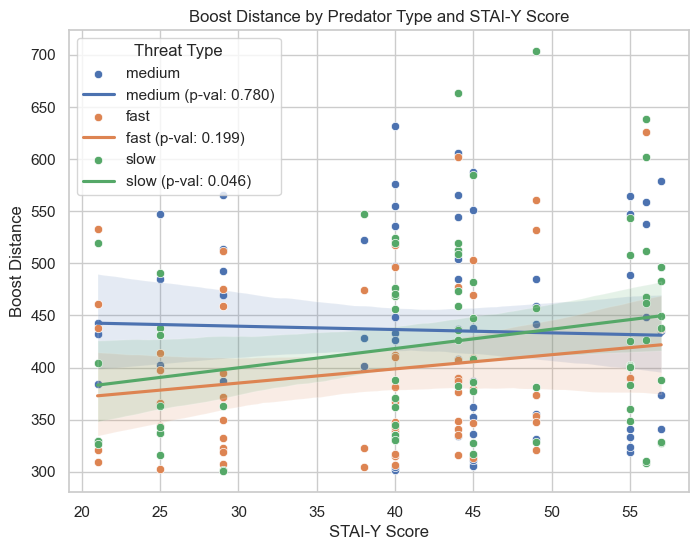

In [96]:
# Filter the DataFrame to include only rows where 'boost_distance' > 300
df2 = df[df['boost_distance'] > 300]

# Set style
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over unique threat types
for threat_type in df2['threat_type'].unique():
    # Subset data for the current threat_type
    subset_data = df2[df2['threat_type'] == threat_type]
    
    # Plot scatter plot
    sns.scatterplot(data=subset_data, x='STAI', y='boost_distance', ax=ax, label=threat_type)
    
    # Fit linear regression model for the current threat_type
    model = smf.ols("boost_distance ~ STAI", data=subset_data)
    result = model.fit()
    
    # Plot linear regression line
    sns.regplot(data=subset_data, x='STAI', y='boost_distance', scatter=False, ax=ax, 
                label=f"{threat_type} (p-val: {result.pvalues['STAI']:.3f})")

# Add legend and labels
plt.legend(title='Threat Type')
plt.xlabel('STAI-Y Score')
plt.ylabel('Boost Distance')
plt.title('Boost Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show() 

In [91]:
from scipy.stats import linregress

In [65]:
df.describe()

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,5.141644,0.196000,204.549206,225.927573,93.764830,0.121567,0.124376,41.866667,128.222805,8.000000,257.082200,0.804000
std,9.098844,0.397233,91.237364,145.093162,97.749685,0.062030,0.059990,10.308115,104.057008,4.323377,112.780647,0.086529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,21.000000,0.000000,1.000000,151.877300,0.640000
25%,2.831200,0.000000,155.045975,123.060000,13.837550,0.064200,0.066325,38.000000,52.706875,4.000000,187.860100,0.740000
50%,4.312250,0.000000,201.871100,188.740000,73.091000,0.136650,0.137200,44.000000,111.035600,8.000000,213.982700,0.840000
75%,5.832075,0.000000,247.780750,318.400000,145.158875,0.183975,0.184625,49.000000,172.480500,12.000000,325.577500,0.860000
max,204.918000,1.000000,635.600000,703.440000,651.560000,0.224600,0.224600,57.000000,560.561100,15.000000,560.561100,0.940000


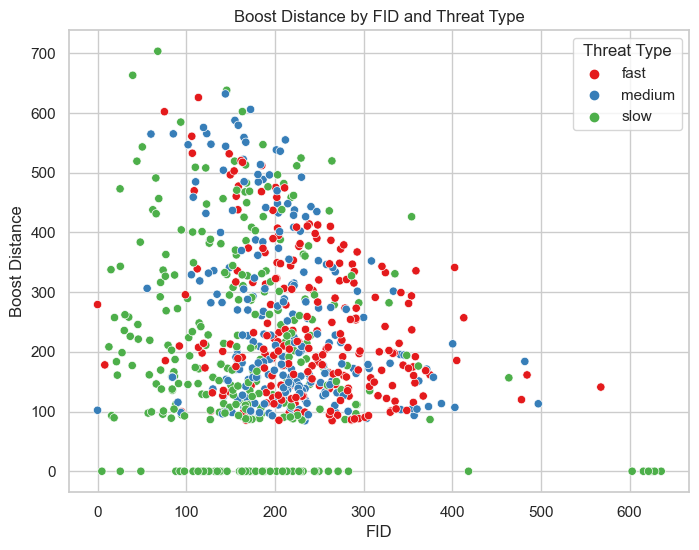

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fid', y='boost_distance', hue='threat_type', palette='Set1')

# Add legend and labels
plt.legend(title='Threat Type')
plt.xlabel('FID')
plt.ylabel('Boost Distance')
plt.title('Boost Distance by FID and Threat Type')

# Show plot
plt.show()

In [70]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_49664\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,boost_flag,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials
economic_score,1.000000,-0.279194,-0.298799,-0.052040,-0.030398,-0.304299,-0.320486,-0.147662,-0.127093,0.193773,-0.033971,0.247901,-0.063529
fail_count,-0.279194,1.000000,-0.259183,0.163681,-0.473930,0.417418,0.437461,0.142942,-0.051973,0.073899,0.103395,0.055823,-0.217830
fid,-0.298799,-0.259183,1.000000,-0.201997,0.584078,0.281355,0.272922,-0.076190,0.069571,-0.204222,-0.161750,-0.318070,0.213472
boost_distance,-0.052040,0.163681,-0.201997,1.000000,-0.267365,0.103293,0.193087,0.451100,-0.006283,0.022426,0.026174,0.040721,-0.043237
final distance,-0.030398,-0.473930,0.584078,-0.267365,1.000000,-0.574868,-0.583538,-0.447074,0.127579,-0.204476,-0.194027,-0.245747,0.206121
before speed,-0.304299,0.417418,0.281355,0.103293,-0.574868,1.000000,0.954747,0.474351,-0.087637,0.015130,0.074545,-0.030527,-0.065818
after speed,-0.320486,0.437461,0.272922,0.193087,-0.583538,0.954747,1.000000,0.504054,-0.074212,0.011865,0.062129,-0.052521,-0.060651
boost_flag,-0.147662,0.142942,-0.076190,0.451100,-0.447074,0.474351,0.504054,1.000000,-0.030398,0.060205,-0.006932,0.034649,-0.017779
STAI,-0.127093,-0.051973,0.069571,-0.006283,0.127579,-0.087637,-0.074212,-0.030398,1.000000,-0.237543,0.268126,-0.512675,0.238597
cumulative_economic_score_50,0.193773,0.073899,-0.204222,0.022426,-0.204476,0.015130,0.011865,0.060205,-0.237543,1.000000,-0.072749,0.474979,-0.096245


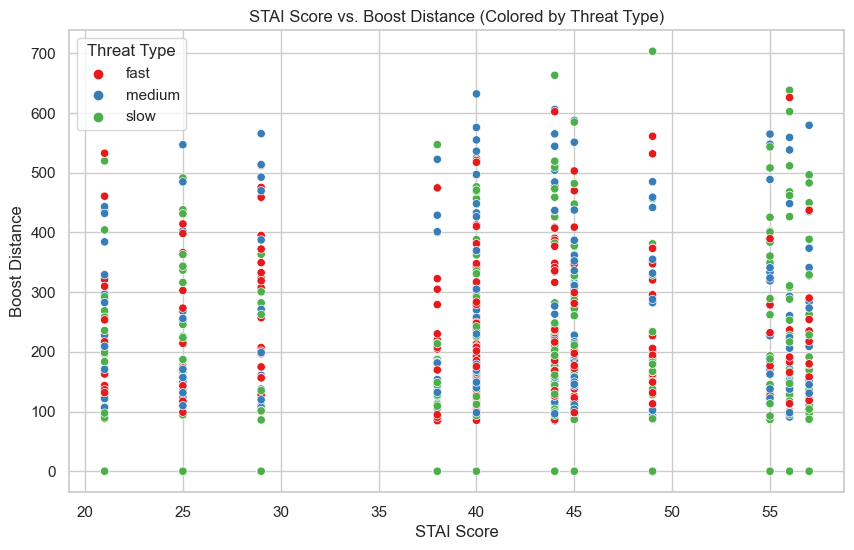

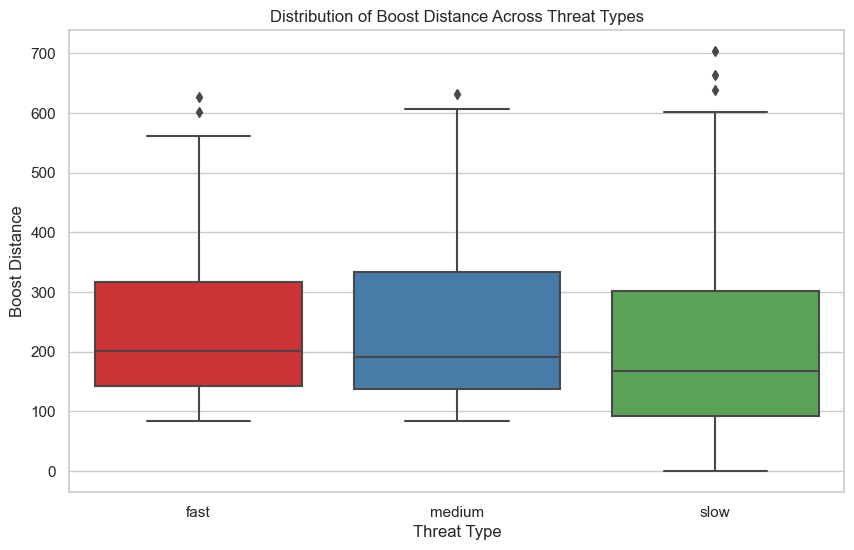

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of STAI score vs. boost distance, colored by threat type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='STAI', y='boost_distance', hue='threat_type', palette='Set1')
plt.title('STAI Score vs. Boost Distance (Colored by Threat Type)')
plt.xlabel('STAI Score')
plt.ylabel('Boost Distance')
plt.legend(title='Threat Type')
plt.show()

# Box plot of boost distance across different threat types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='threat_type', y='boost_distance', palette='Set1')
plt.title('Distribution of Boost Distance Across Threat Types')
plt.xlabel('Threat Type')
plt.ylabel('Boost Distance')
plt.show()


In [72]:
import scipy.stats as stats

# ANOVA for boost distance across different threat types
anova_results = stats.f_oneway(df[df['threat_type'] == 'fast']['boost_distance'],
                               df[df['threat_type'] == 'medium']['boost_distance'],
                               df[df['threat_type'] == 'slow']['boost_distance'])

print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

# Correlation analysis for each threat type
for threat_type in df['threat_type'].unique():
    subset_data = df[df['threat_type'] == threat_type]
    correlation_coef, p_value = stats.pearsonr(subset_data['STAI'], subset_data['boost_distance'])
    print("\nCorrelation analysis for", threat_type, "threat type:")
    print("Correlation coefficient:", correlation_coef)
    print("p-value:", p_value)


ANOVA Results:
F-statistic: 8.47713572076452
p-value: 0.0002288677073664915

Correlation analysis for fast threat type:
Correlation coefficient: -0.08004140666186017
p-value: 0.22863271376006392

Correlation analysis for medium threat type:
Correlation coefficient: 0.018320459286173697
p-value: 0.7832121414202972

Correlation analysis for slow threat type:
Correlation coefficient: 0.031261832502687326
p-value: 0.5934274844642057


In [100]:
df2=df[df['boost_distance']>300]

In [102]:
df2['absolute_fid']=700-df2['fid']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_49664\2295213937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['absolute_fid']=700-df2['fid']


In [104]:
df2['diff']=df2.loc[:,'absolute_fid']-df2.loc[:,'boost_distance']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_49664\1801366193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diff']=df2.loc[:,'absolute_fid']-df2.loc[:,'boost_distance']


In [105]:
df2

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,threat_type,boost_flag,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials,absolute_fid,diff
1,3.7303,0,268.0753,334.08,111.6475,0.1477,0.1477,medium,True,44,3.7303,1,151.8773,0.80,431.9247,97.8447
3,4.0430,0,247.3394,390.20,35.2609,0.1824,0.1824,fast,True,44,11.4557,1,151.8773,0.80,452.6606,62.4606
4,2.8236,0,354.1600,426.28,367.5346,0.0200,0.0680,slow,True,44,14.2793,1,151.8773,0.80,345.8400,-80.4400
6,3.6634,0,272.9669,348.40,71.6573,0.2055,0.2055,fast,True,44,21.9391,1,151.8773,0.80,427.0331,78.6331
10,0.0000,1,175.1062,316.32,0.0000,0.1869,0.1869,fast,True,44,32.9660,1,151.8773,0.80,524.8938,208.5738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,5.5297,0,180.8425,497.08,34.0204,0.1417,0.1417,medium,True,40,125.1372,15,204.5002,0.74,519.1575,22.0775
733,0.0000,1,163.5008,517.48,0.0000,0.2144,0.2144,fast,True,40,130.8730,15,204.5002,0.74,536.4992,19.0192
736,5.3998,0,185.1936,330.96,162.4037,0.0642,0.0642,slow,True,40,149.6803,15,204.5002,0.74,514.8064,183.8464
740,0.0000,1,228.3244,381.16,0.0000,0.1984,0.1984,fast,True,40,166.1764,15,204.5002,0.74,471.6756,90.5156


In [106]:
df3=df2[df2['diff']>=0]

In [107]:
df3

,economic_score,fail_count,fid,boost_distance,final distance,before speed,after speed,threat_type,boost_flag,STAI,cumulative_economic_score_50,player,total_earning,proportion_of_successful_escape_trials,absolute_fid,diff
1,3.7303,0,268.0753,334.08,111.6475,0.1477,0.1477,medium,True,44,3.7303,1,151.8773,0.80,431.9247,97.8447
3,4.0430,0,247.3394,390.20,35.2609,0.1824,0.1824,fast,True,44,11.4557,1,151.8773,0.80,452.6606,62.4606
6,3.6634,0,272.9669,348.40,71.6573,0.2055,0.2055,fast,True,44,21.9391,1,151.8773,0.80,427.0331,78.6331
10,0.0000,1,175.1062,316.32,0.0000,0.1869,0.1869,fast,True,44,32.9660,1,151.8773,0.80,524.8938,208.5738
23,4.5214,0,221.1719,408.64,58.4979,0.1516,0.1516,medium,True,44,76.7363,1,151.8773,0.80,478.8281,70.1881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,5.5297,0,180.8425,497.08,34.0204,0.1417,0.1417,medium,True,40,125.1372,15,204.5002,0.74,519.1575,22.0775
733,0.0000,1,163.5008,517.48,0.0000,0.2144,0.2144,fast,True,40,130.8730,15,204.5002,0.74,536.4992,19.0192
736,5.3998,0,185.1936,330.96,162.4037,0.0642,0.0642,slow,True,40,149.6803,15,204.5002,0.74,514.8064,183.8464
740,0.0000,1,228.3244,381.16,0.0000,0.1984,0.1984,fast,True,40,166.1764,15,204.5002,0.74,471.6756,90.5156


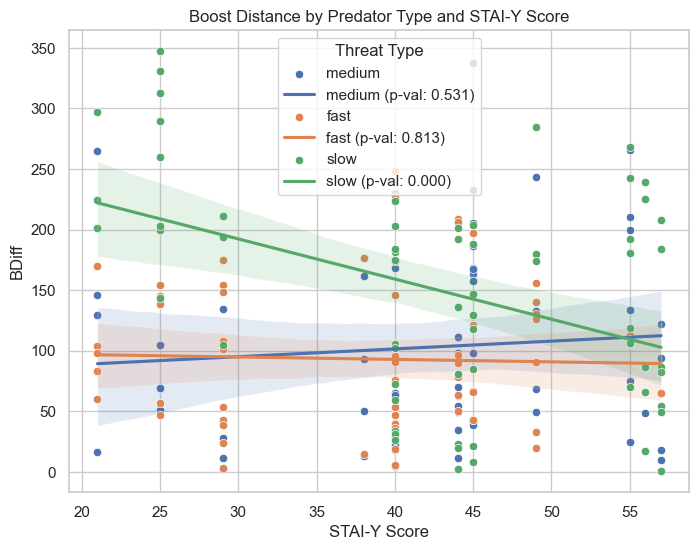

In [108]:
# Filter the DataFrame to include only rows where 'boost_distance' > 300


# Set style
sns.set(style="whitegrid")

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over unique threat types
for threat_type in df3['threat_type'].unique():
    # Subset data for the current threat_type
    subset_data = df3[df3['threat_type'] == threat_type]
    
    # Plot scatter plot
    sns.scatterplot(data=subset_data, x='STAI', y='diff', ax=ax, label=threat_type)
    
    # Fit linear regression model for the current threat_type
    model = smf.ols("diff ~ STAI", data=subset_data)
    result = model.fit()
    
    # Plot linear regression line
    sns.regplot(data=subset_data, x='STAI', y='diff', scatter=False, ax=ax, 
                label=f"{threat_type} (p-val: {result.pvalues['STAI']:.3f})")

# Add legend and labels
plt.legend(title='Threat Type')
plt.xlabel('STAI-Y Score')
plt.ylabel('BDiff')
plt.title('Boost Distance by Predator Type and STAI-Y Score')

# Show plot
plt.show() 